# Binary Classification using Logistic Regression

* Logistic Regression is used for **classification**, not regression.

* It predicts the **probability** of a class (e.g., 0 or 1).

* Uses the **sigmoid function** to squeeze output between **0 and 1**.

* Decision rule:

  * Probability ≥ 0.5 → class 1
  * Probability < 0.5 → class 0

* Works well when:

  * Classes are **linearly separable**,
  * You need a **fast**, simple model.

* Supports **regularization** (L1, L2) to avoid overfitting.

* For more than 2 classes, it uses **OvR** or **Softmax (Multinomial)**.


In [110]:
# ================================
# 1. Import Libraries
# ================================
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

In [111]:
# ================================
# 2. Load Dataset
# ================================
df = pd.read_csv('diabetes.csv')

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [112]:
# Keep a few useful columns
df = df[["Glucose", "BloodPressure", "Insulin", "Age","Outcome","Pregnancies"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Glucose        768 non-null    int64
 1   BloodPressure  768 non-null    int64
 2   Insulin        768 non-null    int64
 3   Age            768 non-null    int64
 4   Outcome        768 non-null    int64
 5   Pregnancies    768 non-null    int64
dtypes: int64(6)
memory usage: 36.1 KB


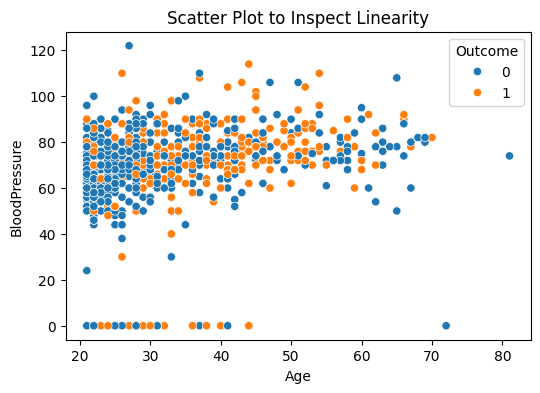

In [113]:
# ---- 1. VISUAL CHECK ----
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Age'],y=df['BloodPressure'],hue=df['Outcome'])
plt.title("Scatter Plot to Inspect Linearity")
plt.show()

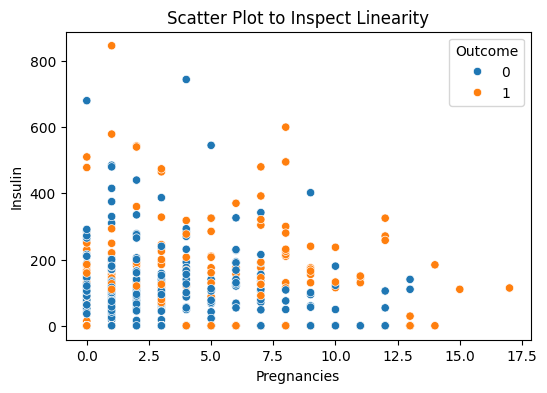

In [114]:
# ---- 1. VISUAL CHECK ----
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Pregnancies'],y=df['Insulin'],hue=df['Outcome'])
plt.title("Scatter Plot to Inspect Linearity")
plt.show()

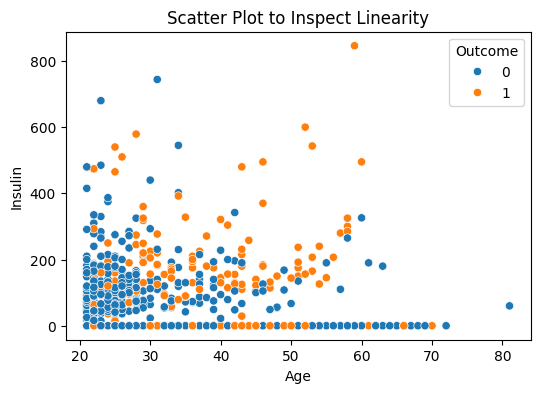

In [115]:
# ---- 1. VISUAL CHECK ----
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Age'],y=df['Insulin'],hue=df['Outcome'])
plt.title("Scatter Plot to Inspect Linearity")
plt.show()

In [116]:
df.skew()

Glucose          0.173754
BloodPressure   -1.843608
Insulin          2.272251
Age              1.129597
Outcome          0.635017
Pregnancies      0.901674
dtype: float64

In [117]:
# --- Log transform example (for skewed features)
df["Insulin_log"] = np.log1p(df["Insulin"])
df['BloodPressure_log']=np.log1p(df['BloodPressure'])
df['Age_log']=np.log1p(df['Age'])

C:\Users\USER\AppData\Local\Temp\ipykernel_8412\3337304285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Insulin_log"] = np.log1p(df["Insulin"])
C:\Users\USER\AppData\Local\Temp\ipykernel_8412\3337304285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BloodPressure_log']=np.log1p(df['BloodPressure'])


In [118]:
# ================================
# 4. Split Data
# ================================
X = df[["Glucose", "BloodPressure_log", "Insulin_log", "Age_log","Pregnancies"]]
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(614, 5)
(614,)
(154, 5)
(154,)


In [119]:
# ================================
# 5. Scaling
# ================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [120]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

print("\n=== Logistic Regression (Normal) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


=== Logistic Regression (Normal) ===
Accuracy: 0.7727272727272727
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



AUC Score: 0.7992653810835629


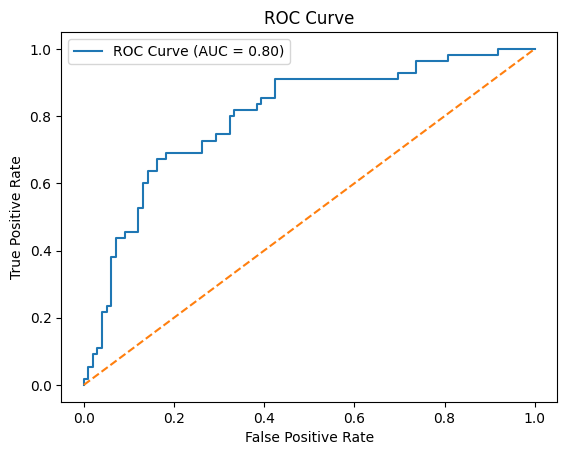

In [121]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for class 1
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Compute ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC
roc_auc = auc(fpr, tpr)

print("AUC Score:", roc_auc)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Lasso Logistic Regression (L1)

* L1 drives coefficients to exactly zero → feature selection

* C controls strength:

    Small C → stronger regularization → more coefficients become zero

    Large C → weaker regularization

In [122]:
lasso = LogisticRegression(
    penalty="l1",
    solver="liblinear",   # or saga for multiclassification
    C=1.0
)
lasso.fit(X_train_scaled, y_train)
pred_lasso = lasso.predict(X_test_scaled)

print("\n=== Lasso Logistic Regression (L1) ===")
print("Accuracy:", accuracy_score(y_test, pred_lasso))
print(classification_report(y_test, pred_lasso))


=== Lasso Logistic Regression (L1) ===
Accuracy: 0.7792207792207793


              precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.62      0.67        55

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



## Ridge Logistic Regression (L2)

* L2 shrinks coefficients but never makes them zero.

* This means no feature selection, all features stay in the model.

* Small C = strong regularization → coefficients shrink more.

* Large C = weak regularization → coefficients shrink less.

* Useful for reducing overfitting and handling multicollinearity.

In [123]:
ridge = LogisticRegression(
    penalty="l2",
    C=1.0
)
ridge.fit(X_train_scaled, y_train)
pred_ridge = ridge.predict(X_test_scaled)

print("\n=== Ridge Logistic Regression (L2) ===")
print("Accuracy:", accuracy_score(y_test, pred_ridge))
print(classification_report(y_test, pred_ridge))


=== Ridge Logistic Regression (L2) ===
Accuracy: 0.7727272727272727
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



# **Multiclass Classification with Logistic Regression**

* Logistic Regression can handle **more than two classes** using two strategies:

  **1. One-vs-Rest (OvR)**

  * Default in scikit-learn.
  * Creates **one logistic regression model per class**.
  * Each model predicts: “Is this sample class *k* or not?”

  **2. Multinomial (Softmax Regression)**

  * Uses **softmax function** to output probabilities for **all classes at once**.
  * Usually gives better performance than OvR.
  * Requires solvers like `lbfgs`, `saga`, or `newton-cg`.

* The model outputs **class probabilities**, and the class with the highest probability becomes the prediction.

* Regularization still applies (L1/L2), and `C` controls the strength.

* Common use cases: digit recognition, iris flowers classification, sentiment categories, etc.


In [124]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [125]:
import numpy as np

# 1. Define the conditions for each age group
# Note: I have clearly defined the 'middle aged' range as 30 <= Age <= 55
conditions = [
    # Condition 1: Age < 30
    df['Age'] < 30,
    
    # Condition 2: Age >= 30 AND Age <= 55
    (df['Age'] >= 30) & (df['Age'] <= 55),
    
    # Condition 3: Age > 55 (covers the rest)
    df['Age'] > 55 
]

# 2. Define the corresponding labels
labels = [
    'young adults',
    'middle aged',
    'senior'
]

# 3. Use numpy.select to create the new column
df['Age_Group'] = np.select(conditions, labels, default='Other/Missing')

In [ ]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

In [127]:
categorical_columns=df.select_dtypes(include=['object','category']).columns
print('Categorical Columns:', categorical_columns)


Categorical Columns: Index(['Age_Group'], dtype='object')


In [134]:
df.drop(["Age_log"],axis=1,inplace=True)
df.drop(['BloodPressure_log'],axis=1,inplace=True)
df.drop(['Insulin_log'],axis=1,inplace=True)

In [137]:
df

,Glucose,BloodPressure,Insulin,Age,Outcome,Pregnancies,Age_Group
0,148,72,0,50,1,6,0
1,85,66,0,31,0,1,0
2,183,64,0,32,1,8,0
3,89,66,94,21,0,1,2
4,137,40,168,33,1,0,0
...,...,...,...,...,...,...,...
763,101,76,180,63,0,10,1
764,122,70,0,27,0,2,2
765,121,72,112,30,0,5,0
766,126,60,0,47,1,1,0


In [136]:
le=LabelEncoder()
for cols in df.select_dtypes('object').columns:
     df[cols]=le.fit_transform(df[cols])

In [138]:
df.columns

Index(['Glucose', 'BloodPressure', 'Insulin', 'Age', 'Outcome', 'Pregnancies',
       'Age_Group'],
      dtype='object')

In [139]:
X=df[["Glucose","BloodPressure","Insulin","Outcome","Pregnancies"]]
y=df['Age_Group']
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=42
)

In [140]:
#Multiclass Logistic Regression (Softmax)
model = LogisticRegression(
    multi_class="multinomial",
    max_iter=500
)

model.fit(X_train, y_train)

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'multinomial'


In [141]:
 #Predictions
y_pred = model.predict(X_test)

# Results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7142857142857143

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.75      0.68        60
           1       0.00      0.00      0.00        17
           2       0.79      0.84      0.82        77

    accuracy                           0.71       154
   macro avg       0.47      0.53      0.50       154
weighted avg       0.64      0.71      0.67       154



c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag